In [1]:
#Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
#load in datasets
matches = pd.read_csv("epl_matches.csv", index_col=0) 
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,7.0,1.0,18.9,1.0,0,0,2019,Huddersfield Town
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,Match Report,NaN,13.0,3.0,18.1,1.0,0,0,2019,Huddersfield Town
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,Match Report,NaN,5.0,1.0,21.6,0.0,0,0,2019,Huddersfield Town
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,Match Report,NaN,7.0,3.0,19.0,1.0,0,0,2019,Huddersfield Town


In [3]:
# Get the shape
matches.shape

(4366, 27)

In [4]:
# How many Matches each team has played. Keep in mind of relegation and promotion rules.
matches["team"].value_counts()

team
West Ham United             219
Arsenal                     218
Crystal Palace              218
Manchester City             218
Everton                     218
Tottenham Hotspur           218
Manchester United           218
Brighton and Hove Albion    218
Wolverhampton Wanderers     218
Newcastle United            218
Liverpool                   218
Chelsea                     217
Leicester City              190
Southampton                 190
Aston Villa                 181
Burnley                     181
Fulham                      143
Bournemouth                 142
Watford                     114
Leeds United                114
Brentford                   105
Sheffield United            104
Norwich City                 76
Nottingham Forest            67
West Bromwich Albion         38
Cardiff City                 38
Huddersfield Town            38
Luton Town                   29
Name: count, dtype: int64

In [5]:
# Datatype of each value
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [6]:
#convert date to date-time
matches["date"] = pd.to_datetime(matches["date"])
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [7]:
# setting the venue code

matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches
# 0 = away 
# 1 = home

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal,1
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal,0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal,1
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal,1
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,NaN,7.0,1.0,18.9,1.0,0,0,2019,Huddersfield Town,0
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,NaN,13.0,3.0,18.1,1.0,0,0,2019,Huddersfield Town,1
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,NaN,5.0,1.0,21.6,0.0,0,0,2019,Huddersfield Town,0
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,NaN,7.0,3.0,19.0,1.0,0,0,2019,Huddersfield Town,1


In [8]:
# Create numeric codes for each unique 'opponent' value and store them in a new column 'opp_code'.
matches["opp_code"] = matches["opponent"].astype("category").cat.codes


In [9]:
# Create numeric codes for each unique 'team' value and store them in a new column 'team_code'.
matches["team_code"] = matches["team"].astype("category").cat.codes

In [10]:
# Extract the hour component from the 'time' column and store it as integers in a new column named 'hour'.
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,team_code,hour
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,19.1,0.0,0,0,2024,Arsenal,1,20,0,12
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,16.4,0.0,1,1,2024,Arsenal,0,8,0,20
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,13.8,0.0,1,1,2024,Arsenal,1,10,0,15
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,15.0,0.0,0,0,2024,Arsenal,1,17,0,16
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,17.4,0.0,0,0,2024,Arsenal,0,9,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,18.9,1.0,0,0,2019,Huddersfield Town,0,23,11,12
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,18.1,1.0,0,0,2019,Huddersfield Town,1,24,11,15
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,21.6,0.0,0,0,2019,Huddersfield Town,0,14,11,20
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,19.0,1.0,0,0,2019,Huddersfield Town,1,17,11,14


In [11]:
# Add a new column 'day_code' to the 'matches' DataFrame, containing the day of the week from the 'date' column.
matches["day_code"] = matches["date"].dt.dayofweek
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,0.0,0,0,2024,Arsenal,1,20,0,12,5
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,0.0,1,1,2024,Arsenal,0,8,0,20,0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,0.0,1,1,2024,Arsenal,1,10,0,15,5
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,0.0,0,0,2024,Arsenal,1,17,0,16,6
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,0.0,0,0,2024,Arsenal,0,9,0,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,1.0,0,0,2019,Huddersfield Town,0,23,11,12,5
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,1.0,0,0,2019,Huddersfield Town,1,24,11,15,5
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,0.0,0,0,2019,Huddersfield Town,0,14,11,20,4
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,1.0,0,0,2019,Huddersfield Town,1,17,11,14,6


In [12]:
#target will be if team won lost or drawn
conditions = [
    (matches["result"] == "W"),  # Win condition
    (matches["result"] == "L"),  # Lose condition
    (matches["result"] == "D")   # Draw condition
]

values = [1, -1, 0,]  # 1 for win, -1 for lose, 0 for draw
matches["target"] = np.select(conditions, values, default=np.nan)
# # Apply np.select to create the 'target' column based on the defined conditions and values
matches


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code,target
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,0,0,2024,Arsenal,1,20,0,12,5,1.0
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,1,1,2024,Arsenal,0,8,0,20,0,1.0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,1,1,2024,Arsenal,1,10,0,15,5,0.0
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,0,0,2024,Arsenal,1,17,0,16,6,1.0
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,0,0,2024,Arsenal,0,9,0,16,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,0,0,2019,Huddersfield Town,0,23,11,12,5,-1.0
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,0,0,2019,Huddersfield Town,1,24,11,15,5,-1.0
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,0,0,2019,Huddersfield Town,0,14,11,20,4,-1.0
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,0,0,2019,Huddersfield Town,1,17,11,14,6,0.0


In [13]:
#convert poss from an int to a percentage represented as a float
matches["poss"] = matches["poss"]/100
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code,target
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,0,0,2024,Arsenal,1,20,0,12,5,1.0
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,1,1,2024,Arsenal,0,8,0,20,0,1.0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,1,1,2024,Arsenal,1,10,0,15,5,0.0
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,0,0,2024,Arsenal,1,17,0,16,6,1.0
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,0,0,2024,Arsenal,0,9,0,16,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,0,0,2019,Huddersfield Town,0,23,11,12,5,-1.0
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,0,0,2019,Huddersfield Town,1,24,11,15,5,-1.0
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,0,0,2019,Huddersfield Town,0,14,11,20,4,-1.0
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,0,0,2019,Huddersfield Town,1,17,11,14,6,0.0


In [14]:
## This function calculates the rolling stats for Team, and Opponent, and the comparison stats between the team and the opponent.
## The function takes two arguments: the 'matches' DataFrame and the 'window' size.
## The function returns the 'matches' DataFrame with the calculated stats.
## to change the window size,(number of previous matches to include) change the value of the 'window' argument in the function call.

def calculate_rolling_stats(matches, window):
    # Sort the DataFrame by team and date
    matches = matches.sort_values(['team', 'date'])

    # Calculate rolling statistics for the team
    matches['last_{}_results'.format(window)] = matches.groupby('team')['target'].rolling(window).sum().shift().reset_index(0, drop=True)
    matches['last_{}_gf'.format(window)] = matches.groupby('team')['gf'].rolling(window).sum().shift().reset_index(0, drop=True)
    matches['last_{}_ga'.format(window)] = matches.groupby('team')['ga'].rolling(window).sum().shift().reset_index(0, drop=True)
    matches['last_{}_avg_poss'.format(window)] = matches.groupby('team')['poss'].rolling(window).mean().shift().reset_index(0, drop=True)
    matches['last_{}_avg_sot'.format(window)] = matches.groupby('team')['sot'].rolling(window).mean().shift().reset_index(0, drop=True)
    
    # Sort the DataFrame by opponent and date
    #matches = matches.sort_values(['opponent', 'date', 'round'])
    matches = matches.groupby(['opponent', 'season']).apply(lambda x: x.sort_values('date')).reset_index(drop=True)
    # Calculate rolling statistics for the opponent


    matches['opp_last_{}_results'.format(window)] = matches.groupby('opponent')['target'].rolling(window).sum().shift().reset_index(0, drop=True) * -1
    matches['opp_last_{}_gf'.format(window)] = matches.groupby('opponent')['ga'].rolling(window).sum().shift().reset_index(0, drop=True)
    matches['opp_last_{}_ga'.format(window)] = matches.groupby('opponent')['gf'].rolling(window).sum().shift().reset_index(0, drop=True)
    matches['opp_last_{}_avg_poss'.format(window)] = matches.groupby('opponent')['poss'].rolling(window).mean().shift().reset_index(0, drop=True)
    matches['opp_last_{}_avg_sot'.format(window)] = matches.groupby('opponent')['sot'].rolling(window).mean().shift().reset_index(0, drop=True) 

    # matches['opp_last_{}_results'.format(window)] = matches.groupby('opponent')['target'].rolling(window).sum().shift().reset_index(0, drop=True)
    # matches['opp_last_{}_gf'.format(window)] = matches.groupby('opponent')['ga'].rolling(window).sum().shift().reset_index(0, drop=True)
    # matches['opp_last_{}_ga'.format(window)] = matches.groupby('opponent')['gf'].rolling(window).sum().shift().reset_index(0, drop=True)
    # matches['opp_last_{}_avg_poss'.format(window)] = matches.groupby('opponent')['poss'].rolling(window).mean().shift().reset_index(0, drop=True)
    # matches['opp_last_{}_avg_sot'.format(window)] = matches.groupby('opponent')['sot'].rolling(window).mean().shift().reset_index(0, drop=True) 

    # Calculate the difference between team and opponent stats
    matches['last_{}_gd'.format(window)] = matches['last_{}_gf'.format(window)] - matches['last_{}_ga'.format(window)]
    matches['opp_last_{}_gd'.format(window)] = matches['opp_last_{}_gf'.format(window)] - matches['opp_last_{}_ga'.format(window)]
    matches['last_{}_gd_diff'.format(window)] = matches['last_{}_gd'.format(window)] - matches['opp_last_{}_gd'.format(window)]
    matches['last_{}_avg_poss_diff'.format(window)] = matches['last_{}_avg_poss'.format(window)] - matches['opp_last_{}_avg_poss'.format(window)]
    matches['last_{}_avg_sot_diff'.format(window)] = matches['last_{}_avg_sot'.format(window)] - matches['opp_last_{}_avg_sot'.format(window)]
   
    return matches

matches = calculate_rolling_stats(matches, 3)
matches.head()


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_3_results,opp_last_3_gf,opp_last_3_ga,opp_last_3_avg_poss,opp_last_3_avg_sot,last_3_gd,opp_last_3_gd,last_3_gd_diff,last_3_avg_poss_diff,last_3_avg_sot_diff
0,2018-08-12,16:00,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Arsenal,...,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
1,2018-08-18,17:30,Premier League,Matchweek 2,Sat,Home,W,3.0,2.0,Arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-25,15:00,Premier League,Matchweek 3,Sat,Away,L,1.0,3.0,Arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-02,13:30,Premier League,Matchweek 4,Sun,Home,L,2.0,3.0,Arsenal,...,-1.0,5.0,6.0,0.53,8.000000,-2.0,-1.0,-1.0,-0.093333,-6.333333
4,2018-09-15,15:00,Premier League,Matchweek 5,Sat,Home,L,1.0,2.0,Arsenal,...,1.0,8.0,6.0,0.43,6.333333,-2.0,2.0,-4.0,-0.126667,-3.333333


In [15]:
#output to excel file
matches.to_excel("epl_matches_cleaned.xlsx")


PermissionError: [Errno 13] Permission denied: 'epl_matches_cleaned.xlsx'

In [ ]:
# fill the NaN values in the dataframe columns with the median value of those columns

columns_to_fill = [
    'last_3_results', 'opp_last_3_results',
    'last_3_gf', 'opp_last_3_ga',
    'last_3_gd', 'opp_last_3_gd',
    'last_3_gd_diff', 'last_3_ga',
    'opp_last_3_gf', 'opp_last_3_avg_poss',
    'last_3_avg_poss', 'last_3_avg_poss_diff',
    'opp_last_3_avg_sot', 'last_3_avg_sot',
    'last_3_avg_sot_diff','last_3_gd',
]

for column in columns_to_fill:
    median_value = matches[column].median()
    matches[column].fillna(median_value, inplace=True)

matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_3_results,opp_last_3_gf,opp_last_3_ga,opp_last_3_avg_poss,opp_last_3_avg_sot,last_3_gd,opp_last_3_gd,last_3_gd_diff,last_3_avg_poss_diff,last_3_avg_sot_diff
0,2018-08-12,16:00,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Arsenal,...,-0.0,4.0,4.0,0.503333,4.000000,-1.0,0.0,0.0,0.000000,0.000000
1,2018-08-18,17:30,Premier League,Matchweek 2,Sat,Home,W,3.0,2.0,Arsenal,...,-0.0,4.0,4.0,0.503333,4.000000,0.0,0.0,0.0,0.000000,0.000000
2,2018-08-25,15:00,Premier League,Matchweek 3,Sat,Away,L,1.0,3.0,Arsenal,...,-0.0,4.0,4.0,0.503333,4.000000,0.0,0.0,0.0,0.000000,0.000000
3,2018-09-02,13:30,Premier League,Matchweek 4,Sun,Home,L,2.0,3.0,Arsenal,...,-1.0,5.0,6.0,0.530000,8.000000,-2.0,-1.0,-1.0,-0.093333,-6.333333
4,2018-09-15,15:00,Premier League,Matchweek 5,Sat,Home,L,1.0,2.0,Arsenal,...,1.0,8.0,6.0,0.430000,6.333333,-2.0,2.0,-4.0,-0.126667,-3.333333


In [ ]:
# #random forest classifier
# Define the list of predictors including venue code, opponent code, hour, and day code.
predictors = ["venue_code", "opp_code", "hour", "day_code", 'team_code',
'last_3_results',
'last_3_gf',
'last_3_ga',
'last_3_avg_poss',
'opp_last_3_results',
'opp_last_3_gf',
'opp_last_3_ga',
'opp_last_3_avg_poss',
'last_3_gd',
'opp_last_3_gd',
'last_3_gd_diff',
'last_3_avg_poss_diff',]

# predictors = [
# 'last_3_results',
# 'last_3_gf',
# 'last_3_ga',
# 'last_3_avg_poss',
# 'opp_last_3_results',
# 'opp_last_3_gf',
# 'opp_last_3_ga',
# 'opp_last_3_avg_poss',
# 'last_3_gd',
# 'opp_last_3_gd',
# 'last_3_gd_diff',
# 'last_3_avg_poss_diff',]

# # Define the features (predictors) and the target variable
X = matches[predictors]
y = matches["target"]

# # Split the data into training and testing sets with a ratio of 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# # Initialize a Random Forest classifier with 50 trees, minimum samples split of 10, and a fixed random state.
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, random_state=1)

# # Train the Random Forest classifier on the training data using specified predictors.
rf_model = rf_model.fit(X_train, y_train)

In [ ]:
# Generate predictions using the trained Random Forest classifier on the test data using specified predictors.
# # Train the Random Forest classifier on the training data using specified predictors.
preds = rf_model.predict(X_test)


In [ ]:
# Evaluate the best model on the training set
train_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the best model on the test set
test_accuracy = rf_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7090968586387435
Testing Accuracy: 0.47938931297709925


In [ ]:
# Create a contingency table showing the counts of actual versus predicted labels
combined = pd.DataFrame({"actual": y_test, "prediction": preds})
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,-1.0,0.0,1.0
actual,,,
-1.0,317,7,191
0.0,140,5,170
1.0,171,3,306


In [ ]:
# determine which feature explains the most variance in the model
importances = rf_model.feature_importances_
# return the original feature names
feature_names = X.columns
#create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importance

,feature,importance
0,last_3_results,0.049918
1,last_3_gf,0.063344
2,last_3_ga,0.055158
3,last_3_avg_poss,0.156279
4,opp_last_3_results,0.041230
5,opp_last_3_gf,0.062505
6,opp_last_3_ga,0.052018
7,opp_last_3_avg_poss,0.162546
8,last_3_gd,0.073052
9,opp_last_3_gd,0.068653


<Axes: xlabel='importance', ylabel='feature'>

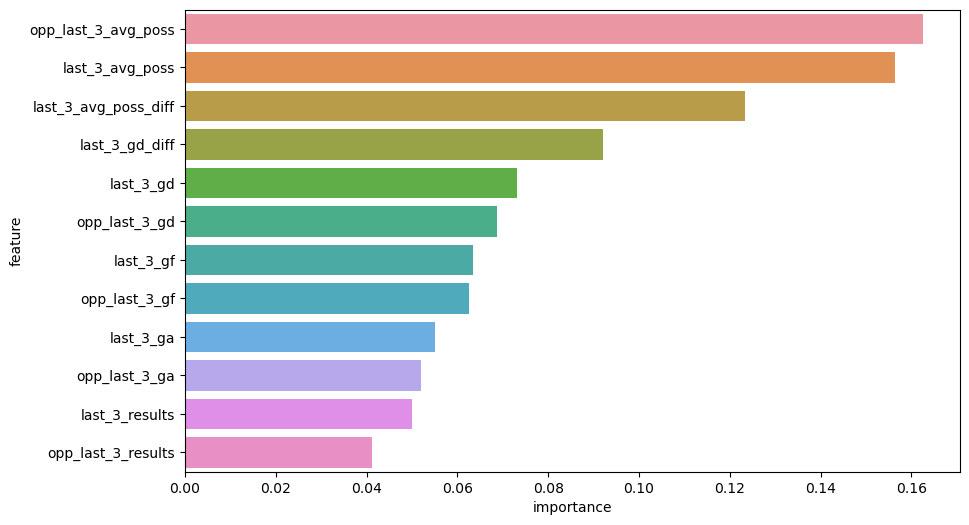

In [ ]:
#create a bar plot to visualize the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False))

In [ ]:
# Generate classification report
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

        -1.0       0.50      0.62      0.55       515
         0.0       0.33      0.02      0.03       315
         1.0       0.46      0.64      0.53       480

    accuracy                           0.48      1310
   macro avg       0.43      0.42      0.37      1310
weighted avg       0.45      0.48      0.42      1310



# Prediction Based on User Selection

In [ ]:
#turns the user input into a dataframe
user_input_columns = ["venue_code", "opp_code", "hour", "day_code", 'team_code']
user_input = pd.read_csv("user_input.csv")
user_input


,venue_code,opp_code,hour,day_code,team_code
0,0,4,12,4,22


In [ ]:
team_1_columns = [
'last_3_results',
'last_3_gf',
'last_3_ga',
'last_3_avg_poss']


team_2_columns= ['last_3_results',
'last_3_gf',
'last_3_ga',
'last_3_avg_poss']

opponent_columns_heading = ['opp_last_3_results',
'opp_last_3_gf',
'opp_last_3_ga',
'opp_last_3_avg_poss']

In [ ]:
# Defining the teams list and their corresponding codes
teams_list = ['Arsenal', 'Aston Villa',
              'Bournemouth', 'Brentford', 'Brighton and Hove Albion', 'Burnley',
              'Cardiff City', 'Chelsea', 'Crystal Palace',
              'Everton',
              'Fulham',
              'Huddersfield Town',
              'Leeds United', 'Leicester City', 'Liverpool', 'Luton Town',
              'Manchester City', 'Manchester United',
              'Newcastle United', 'Norwich City', 'Nottingham Forest',
              'Sheffield United', 'Southampton',
              'Tottenham Hotspur',
              'Watford', 'West Bromwich Albion', 'West Ham United', 'Wolverhampton Wanderers'
              ]

In [ ]:
# Assuming is your DataFrame, 'team_name' is the name of the team, and 'team' is the column with team names
# subtract 1 from the team code in the User_input dataframe to get the team name from the teams_list and store as a veriable
team_1_name = teams_list[user_input["team_code"].values[0] - 1]
team_1_data = matches.loc[matches['team'] == team_1_name, team_1_columns]
# subtract 1 from the opp_code in the User_input dataframe to get the team name from the teams_list and store as a veriable
team_2_name = teams_list[user_input["opp_code"].values[0] - 1]
team_2_data = matches.loc[matches['team'] == team_2_name, team_2_columns]
# Get the last row
last_values_1 = team_1_data.iloc[-1]
last_values_2 = team_2_data.iloc[-1]

#create a new DataFrame with the last values 1 using the 'team_1_columns' as column names
team_1_last_values = pd.DataFrame(last_values_1.values.reshape(1, -1), columns=team_1_columns)
display(team_1_last_values)
#create a new DataFrame with the last values 2 using the 'opponent_column_headings' as column names
team_2_last_values = pd.DataFrame(last_values_2.values.reshape(1, -1), columns=opponent_columns_heading)
display(team_2_last_values)
#create a new dataframe with the user input using the 'user_input_columns' as column names
user_input_df = pd.DataFrame(np.array(user_input).reshape(1, -1), columns=user_input_columns)
display(user_input_df)

,last_3_results,last_3_gf,last_3_ga,last_3_avg_poss
0,-1.0,3.0,11.0,0.28


,opp_last_3_results,opp_last_3_gf,opp_last_3_ga,opp_last_3_avg_poss
0,-1.0,6.0,8.0,0.363333


,venue_code,opp_code,hour,day_code,team_code
0,0,4,12,4,22


In [ ]:
#concatenate the 'user_input_df''team_1_last_values', and 'team_2_last_values', DataFrames along the columns
#combined_df = pd.concat([user_input_df, team_1_last_values, team_2_last_values], axis=1)
combined_df = pd.concat([user_input_df,team_1_last_values, team_2_last_values], axis=1)
combined_df

,last_3_results,last_3_gf,last_3_ga,last_3_avg_poss,opp_last_3_results,opp_last_3_gf,opp_last_3_ga,opp_last_3_avg_poss
0,-1.0,3.0,11.0,0.28,-1.0,6.0,8.0,0.363333


In [ ]:
#Calculate the comparison stats and add them to the dataframecomparison Stats
def calculate_differentials(combined_df, window):
    # Calculate the stat difference between the team and the opponent
    combined_df['last_{}_gd'.format(window)] = combined_df['last_{}_gf'.format(window)] - combined_df['last_{}_ga'.format(window)]
    combined_df['opp_last_{}_gd'.format(window)] = combined_df['opp_last_{}_gf'.format(window)] - combined_df['opp_last_{}_ga'.format(window)]
    combined_df['last_{}_gd_diff'.format(window)] = combined_df['last_{}_gd'.format(window)] - combined_df['opp_last_{}_gd'.format(window)]
    combined_df['last_{}_avg_poss_diff'.format(window)] = combined_df['last_{}_avg_poss'.format(window)] - combined_df['opp_last_{}_avg_poss'.format(window)]

    return combined_df

combined_df = calculate_differentials(combined_df, 3)
combined_df.head()

,last_3_results,last_3_gf,last_3_ga,last_3_avg_poss,opp_last_3_results,opp_last_3_gf,opp_last_3_ga,opp_last_3_avg_poss,last_3_gd,opp_last_3_gd,last_3_gd_diff,last_3_avg_poss_diff
0,-1.0,3.0,11.0,0.28,-1.0,6.0,8.0,0.363333,-8.0,-2.0,-6.0,-0.083333


In [ ]:
print(combined_df.columns)


Index(['last_3_results', 'last_3_gf', 'last_3_ga', 'last_3_avg_poss',
       'opp_last_3_results', 'opp_last_3_gf', 'opp_last_3_ga',
       'opp_last_3_avg_poss', 'last_3_gd', 'opp_last_3_gd', 'last_3_gd_diff',
       'last_3_avg_poss_diff'],
      dtype='object')


In [ ]:
preds = rf_model.predict(combined_df)
preds

array([-1.])